In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_palette ("Set1")
sns.set_style ("ticks")
sns.set_context ("talk") #"paper"

In [ ]:
def read_rdf (fname):

    lines = open(fname, "r").readlines()

    data = {'x': [], 'rdf': []}

    for line in lines:
        words = line.split()
        data['x'].append (float(words[0]))
        data['rdf'].append (float(words[1]))

    return data

data_rdf_pbe = read_rdf ('../Data/rdf_pbe_t2000.dat')
data_rdf_qml = read_rdf ('../Data/BAM_RACE3_QML3_CX/rdf_race_b8_qml_t2000.dat')
data_rdf_qml_cz = read_rdf ('../Data/BAM_RACE3_QML3_CZ/rdf_T2000K_b8_qml_cz.dat')
data_rdf_qft_cx = read_rdf ('../Data/BAM_RACE3_QML3_EQUIV_CX/rdf_T2000K_qft_cx.dat')
data_rdf_qft_cz = read_rdf ('../Data/BAM_RACE3_QML3_EQUIV_CZ/rdf_T2000K_qft_cz.dat')


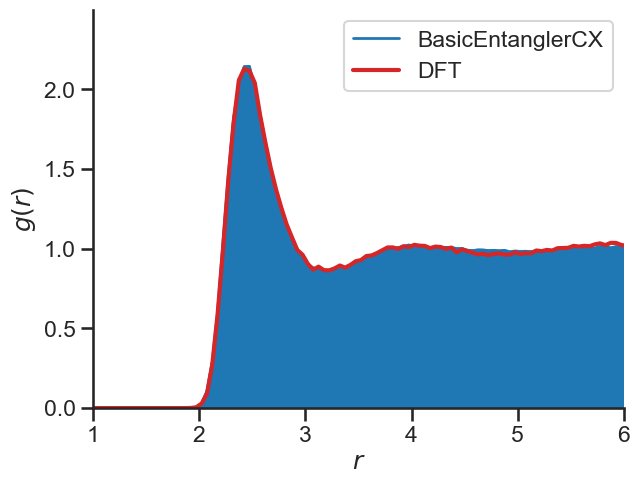

In [11]:


#ax = sns.lineplot (data=data_rdf_mlp, x='x', y='rdf', linestyle='dashed', label="CML")
ax = sns.lineplot (data=data_rdf_qml, x='x', y='rdf', color='tab:blue', linewidth=2, label="BasicEntanglerCX")
ax = sns.lineplot (data=data_rdf_pbe, x='x', y='rdf', linewidth=3, color='tab:red',  label="DFT")

ax.set_xlim ((1, 6))
ax.set_ylim ((0, 2.5))
ax.set_xlabel (r'$r$')
ax.set_ylabel (r'$g(r)$')
ax.set_yticks ([0, 0.5, 1, 1.5, 2])
ax.fill_between (data_rdf_qml['x'], data_rdf_qml['rdf'], color='tab:blue')

sns.despine()
plt.tight_layout (w_pad=1.0)
plt.subplots_adjust (left=0.15, right=0.98, bottom=0.15, top=0.98)
plt.savefig ('fig_rdf.png', dpi=600)

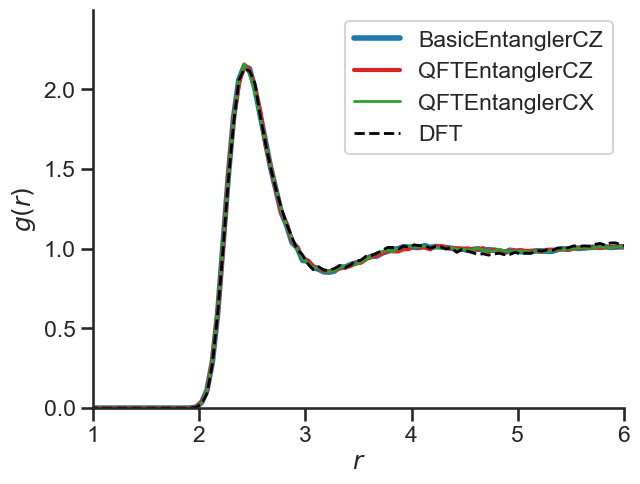

In [4]:

#ax = sns.lineplot (data=data_rdf_mlp, x='x', y='rdf', linestyle='dashed', label="CML")
ax = sns.lineplot (data=data_rdf_qml_cz, x='x', y='rdf', color='tab:blue', linewidth=4, label="BasicEntanglerCZ")
ax = sns.lineplot (data=data_rdf_qft_cz, x='x', y='rdf', color='tab:red', linewidth=3, label="QFTEntanglerCZ")
ax = sns.lineplot (data=data_rdf_qft_cx, x='x', y='rdf', color='tab:green', linewidth=2, label="QFTEntanglerCX")

ax = sns.lineplot (data=data_rdf_pbe, x='x', y='rdf', linestyle='--', dashes=(10,20), linewidth=2, color='black',  label="DFT")

ax.set_xlim ((1, 6))
ax.set_ylim ((0, 2.5))
ax.set_xlabel (r'$r$')
ax.set_ylabel (r'$g(r)$')
ax.set_yticks ([0, 0.5, 1, 1.5, 2])
#ax.fill_between (data_rdf_qml['x'], data_rdf_qml['rdf'], color='tab:blue')

sns.despine()
plt.tight_layout (w_pad=1.0)
plt.subplots_adjust (left=0.15, right=0.98, bottom=0.15, top=0.98)
plt.savefig ('fig_rdf_qml_T2000K.pdf', dpi=600)

In [ ]:
def read_loss (fname):
    lines = open(fname, 'r').readlines()

    data = {'epoch': [], 'loss': [], 'loss_val': [], 'rmse_F':[], 'rmse_F_val':[], 'rmse_E_val': [] }

    for i, line in enumerate(lines[3:]):
        words = line.split()
        if (i+1)%20 == 0:
            epoch = (i+1)*5
            data['epoch'].append (epoch)
            data['loss'].append (float(words[3]))
            data['loss_val'].append (float(words[8]))
            data['rmse_F'].append (float(words[5]))
            data['rmse_F_val'].append (float(words[10]))
            data['rmse_E_val'].append (float(words[9])/64*1000)

    return data



In [12]:

data_loss_cml = read_loss ('../Data/BAM_RACE3/loss_race.dat')
data_loss_qml = read_loss ('../Data/BAM_RACE3_QML3_CX/loss_race.dat')
data_loss_qml_basic = read_loss ('../Data/BAM_RACE3_QML3_BASIC/loss_race.dat')
data_loss_qml_cz = read_loss ('../Data/BAM_RACE3_QML3_CZ/loss_race.dat')
data_loss_qml_equiv_cx = read_loss ('../Data/BAM_RACE3_QML3_EQUIV_CX/loss_race.dat')
data_loss_qml_equiv_cz = read_loss ('../Data/BAM_RACE3_QML3_EQUIV_CZ/loss_race.dat')

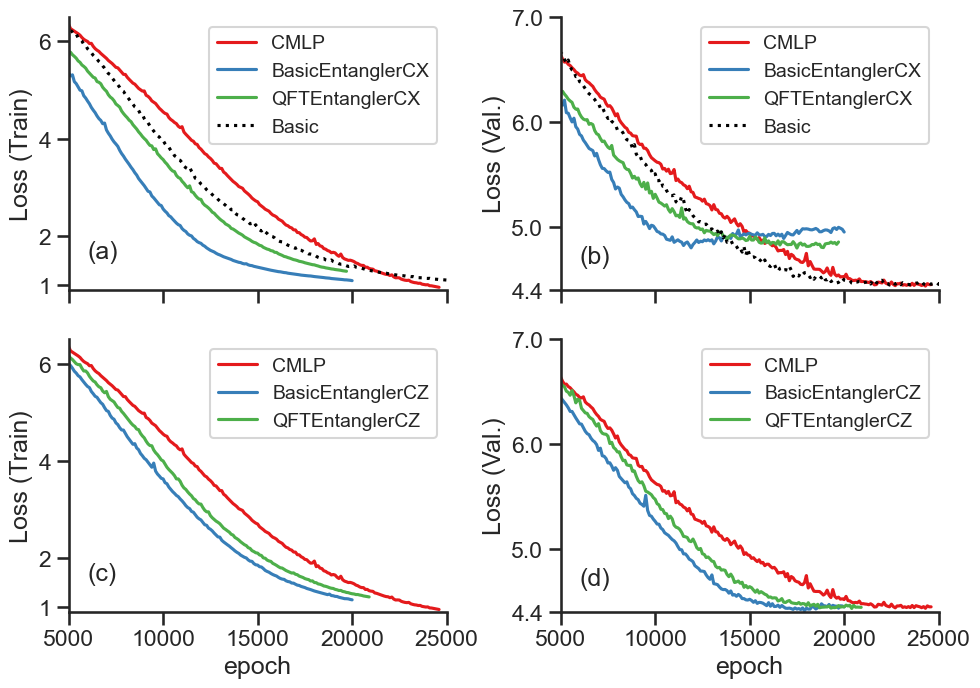

In [13]:
sns.set_palette ("Set1",5)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots (ncols=2, nrows=2, figsize=(10,7), sharex=True)

sns.lineplot (data=data_loss_cml, x='epoch', y='loss', ax=ax1, label="CMLP")
#sns.lineplot (data=data_loss_qml, x='epoch', y='rmse_E_val', linestyle='dashed', ax=ax1, label="HQC-ML")
sns.lineplot (data=data_loss_qml, x='epoch', y='loss', ax=ax1, label="BasicEntanglerCX")
#sns.lineplot (data=data_loss_qml_cz, x='epoch', y='loss', ax=ax1, label="BasicEntanglerCZ")
sns.lineplot (data=data_loss_qml_equiv_cx, x='epoch', y='loss', ax=ax1, label="QFTEntanglerCX")
#sns.lineplot (data=data_loss_qml_equiv_cz, x='epoch', y='loss', ax=ax1, label="QFTEntanglerCZ")
sns.lineplot (data=data_loss_qml_basic, x='epoch', y='loss', ax=ax1, linestyle='dotted', color='black', label="Basic")
ax1.set_xlim ( (5000, 25000))
ax1.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax1.set_ylim ( (0.9, 6.5))
ax1.set_yticks( (1, 2,4,6))
ax1.set_ylabel (r"Loss (Train)")
ax1.text (6000, 1.55, '(a)')
ax1.legend (prop={'size':14})

sns.lineplot (data=data_loss_cml, x='epoch', y='loss_val', ax=ax2, label="CMLP")
#sns.lineplot (data=data_loss_qml, x='epoch', y='rmse_F_val', linestyle='dashed', ax=ax2, label="HQC-ML")
sns.lineplot (data=data_loss_qml, x='epoch', y='loss_val', ax=ax2, label="BasicEntanglerCX")
#sns.lineplot (data=data_loss_qml_cz, x='epoch', y='loss_val', ax=ax2, label="BasicEntanglerCZ")
sns.lineplot (data=data_loss_qml_equiv_cx, x='epoch', y='loss_val', ax=ax2, label="QFTEntanglerCX")
#sns.lineplot (data=data_loss_qml_equiv_cz, x='epoch', y='loss_val', ax=ax2, label="QFTEntanglerCZ")
sns.lineplot (data=data_loss_qml_basic, x='epoch', y='loss_val', ax=ax2, linestyle='dotted', color='black', label="Basic")
ax2.set_xlim ( (5000, 25000))
ax2.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax2.set_ylim ( (4.4, 7.))
ax2.set_yticks ( (4.4, 5,6,7) )
ax2.set_ylabel (r"Loss (Val.)")
ax2.text (6000, 4.66, '(b)')
ax2.legend (prop={'size':14})


sns.lineplot (data=data_loss_cml, x='epoch', y='loss', ax=ax3, label="CMLP")
#sns.lineplot (data=data_loss_qml, x='epoch', y='loss', ax=ax1, label="BasicEntanglerCX")
sns.lineplot (data=data_loss_qml_cz, x='epoch', y='loss', ax=ax3, label="BasicEntanglerCZ")
#sns.lineplot (data=data_loss_qml_equiv_cx, x='epoch', y='loss', ax=ax1, label="QFTEntanglerCX")
sns.lineplot (data=data_loss_qml_equiv_cz, x='epoch', y='loss', ax=ax3, label="QFTEntanglerCZ")
#sns.lineplot (data=data_loss_qml_basic, x='epoch', y='loss', ax=ax1, linestyle='dotted', color='black', label="Basic")
ax3.set_xlim ( (5000, 25000))
ax3.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax3.set_ylim ( (0.9, 6.5))
ax3.set_yticks( (1, 2,4,6))
ax3.set_ylabel (r"Loss (Train)")
ax3.text (6000, 1.55, '(c)')
ax3.legend (prop={'size':14})


sns.lineplot (data=data_loss_cml, x='epoch', y='loss_val', ax=ax4, label="CMLP")
#sns.lineplot (data=data_loss_qml, x='epoch', y='loss_val', ax=ax2, label="BasicEntanglerCX")
sns.lineplot (data=data_loss_qml_cz, x='epoch', y='loss_val', ax=ax4, label="BasicEntanglerCZ")
#sns.lineplot (data=data_loss_qml_equiv_cx, x='epoch', y='loss_val', ax=ax2, label="QFTEntanglerCX")
sns.lineplot (data=data_loss_qml_equiv_cz, x='epoch', y='loss_val', ax=ax4, label="QFTEntanglerCZ")
#sns.lineplot (data=data_loss_qml_basic, x='epoch', y='loss_val', ax=ax2, linestyle='dotted', color='black', label="Basic")
ax4.set_xlim ( (5000, 25000))
ax4.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax4.set_ylim ( (4.4, 7.))
ax4.set_yticks ( (4.4, 5,6,7) )
ax4.set_ylabel (r"Loss (Val.)")
ax4.text (6000, 4.66, '(d)')
ax4.legend (prop={'size':14})

sns.despine()
plt.tight_layout (w_pad=0.1)
plt.subplots_adjust (left=0.08, right=0.95, bottom=0.1, top=0.95)
plt.savefig ('fig_loss.pdf', dpi=600)

In [14]:
data_loss_qml_cx = read_loss ('../Data/BAM_RACE3_QML3_CX/loss_race.dat')
data_loss_qml_cx_311 = read_loss ('../Data/BAM_RACE3_QML3_CX/loss_race_si0_b8x_qml_cx_311.out')
data_loss_qml_cx_504 = read_loss ('../Data/BAM_RACE3_QML3_CX/loss_race_si0_b8x_qml_cx_504.out')
data_loss_qml_cz = read_loss ('../Data/BAM_RACE3_QML3_CZ/loss_race.dat')
data_loss_qml_cz_311 = read_loss ('../Data/BAM_RACE3_QML3_CZ/loss_race_si0_b8x_qml_cz_311.out')
data_loss_qml_cz_504 = read_loss ('../Data/BAM_RACE3_QML3_CZ/loss_race_si0_b8x_qml_cz_504.out')

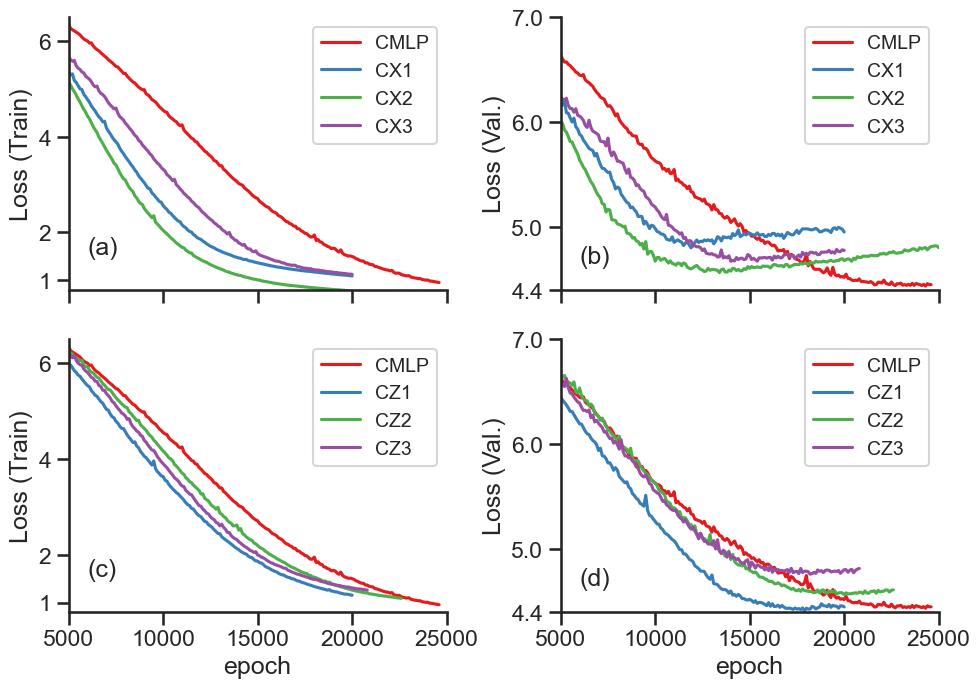

In [15]:
sns.set_palette ("Set1",5)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots (ncols=2, nrows=2, figsize=(10,7), sharex=True)

sns.lineplot (data=data_loss_cml, x='epoch', y='loss', ax=ax1, label="CMLP")
sns.lineplot (data=data_loss_qml_cx, x='epoch', y='loss', ax=ax1, label="CX1")
sns.lineplot (data=data_loss_qml_cx_311, x='epoch', y='loss', ax=ax1, label="CX2")
sns.lineplot (data=data_loss_qml_cx_504, x='epoch', y='loss', ax=ax1, label="CX3")
ax1.set_xlim ( (5000, 25000))
ax1.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax1.set_ylim ( (0.8, 6.5))
ax1.set_yticks( (1, 2,4,6))
ax1.set_ylabel (r"Loss (Train)")
ax1.text (6000, 1.55, '(a)')
ax1.legend (prop={'size':14})


sns.lineplot (data=data_loss_cml, x='epoch', y='loss_val', ax=ax2, label="CMLP")
sns.lineplot (data=data_loss_qml_cx, x='epoch', y='loss_val', ax=ax2, label="CX1")
sns.lineplot (data=data_loss_qml_cx_311, x='epoch', y='loss_val', ax=ax2, label="CX2")
sns.lineplot (data=data_loss_qml_cx_504, x='epoch', y='loss_val', ax=ax2, label="CX3")
ax2.set_xlim ( (5000, 25000))
ax2.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax2.set_ylim ( (4.4, 7.))
ax2.set_yticks ( (4.4, 5,6,7) )
ax2.set_ylabel (r"Loss (Val.)")
ax2.text (6000, 4.66, '(b)')
ax2.legend (prop={'size':14})


sns.lineplot (data=data_loss_cml, x='epoch', y='loss', ax=ax3, label="CMLP")
sns.lineplot (data=data_loss_qml_cz, x='epoch', y='loss', ax=ax3, label="CZ1")
sns.lineplot (data=data_loss_qml_cz_311, x='epoch', y='loss', ax=ax3, label="CZ2")
sns.lineplot (data=data_loss_qml_cz_504, x='epoch', y='loss', ax=ax3, label="CZ3")

ax3.set_xlim ( (5000, 25000))
ax3.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax3.set_ylim ( (0.8, 6.5))
ax3.set_yticks( (1, 2,4,6))
ax3.set_ylabel (r"Loss (Train)")
ax3.text (6000, 1.55, '(c)')
ax3.legend (prop={'size':14})


sns.lineplot (data=data_loss_cml, x='epoch', y='loss_val', ax=ax4, label="CMLP")
sns.lineplot (data=data_loss_qml_cz, x='epoch', y='loss_val', ax=ax4, label="CZ1")
sns.lineplot (data=data_loss_qml_cz_311, x='epoch', y='loss_val', ax=ax4, label="CZ2")
sns.lineplot (data=data_loss_qml_cz_504, x='epoch', y='loss_val', ax=ax4, label="CZ3")

ax4.set_xlim ( (5000, 25000))
ax4.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax4.set_ylim ( (4.4, 7.))
ax4.set_yticks ( (4.4, 5,6,7) )
ax4.set_ylabel (r"Loss (Val.)")
ax4.text (6000, 4.66, '(d)')
ax4.legend (prop={'size':14})

sns.despine()
plt.tight_layout (w_pad=0.1)
plt.subplots_adjust (left=0.08, right=0.95, bottom=0.1, top=0.95)
plt.savefig ('fig_loss_random.pdf', dpi=600)

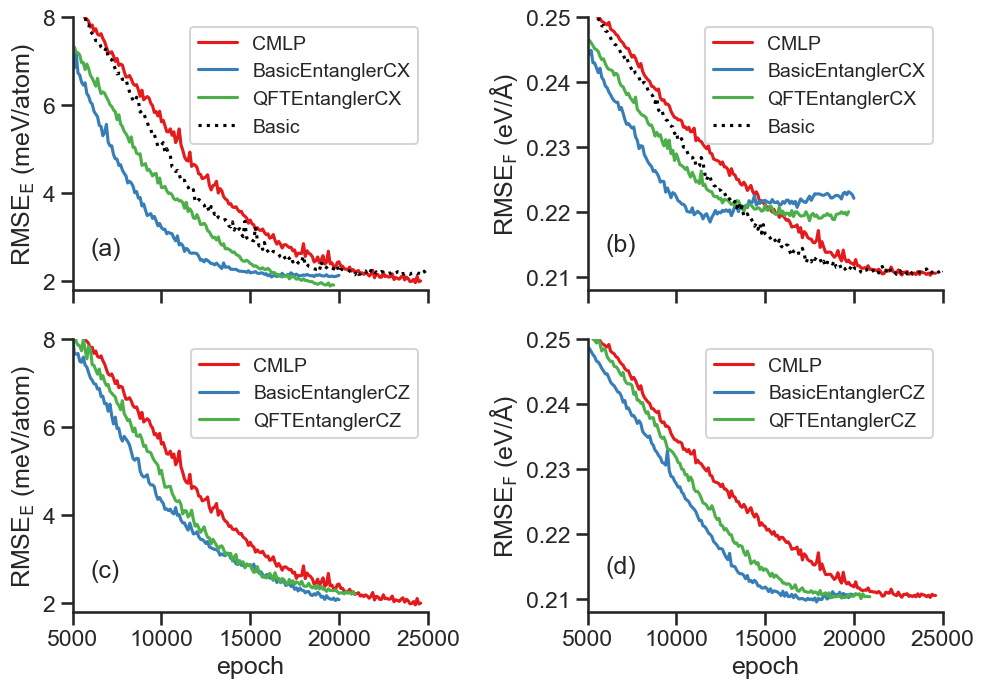

In [16]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots (ncols=2, nrows=2, figsize=(10,7), sharex=True)

sns.lineplot (data=data_loss_cml, x='epoch', y='rmse_E_val', ax=ax1, label="CMLP")
sns.lineplot (data=data_loss_qml, x='epoch', y='rmse_E_val', ax=ax1, label="BasicEntanglerCX")
#sns.lineplot (data=data_loss_qml_cz, x='epoch', y='rmse_E_val', ax=ax1, label="BasicEntanglerCZ")
sns.lineplot (data=data_loss_qml_equiv_cx, x='epoch', y='rmse_E_val', ax=ax1, label="QFTEntanglerCX")
#sns.lineplot (data=data_loss_qml_equiv_cz, x='epoch', y='rmse_E_val', ax=ax1, label="QFTEntanglerCZ")
sns.lineplot (data=data_loss_qml_basic, x='epoch', y='rmse_E_val', ax=ax1, linestyle='dotted', color='black', label="Basic")
ax1.set_xlim ( (5000, 25000))
ax1.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax1.set_ylim ( (1.8, 8))
ax1.set_yticks( (2,4,6,8))
ax1.set_ylabel (r"RMSE$_\mathrm{E}$ (meV/atom)")
ax1.text (6000, 2.6, '(a)')
ax1.legend (prop={'size':14})

sns.lineplot (data=data_loss_cml, x='epoch', y='rmse_F_val', ax=ax2, label="CMLP")
sns.lineplot (data=data_loss_qml, x='epoch', y='rmse_F_val', ax=ax2, label="BasicEntanglerCX")
#sns.lineplot (data=data_loss_qml_cz, x='epoch', y='rmse_F_val', ax=ax2, label="BasicEntanglerCZ")
sns.lineplot (data=data_loss_qml_equiv_cx, x='epoch', y='rmse_F_val', ax=ax2, label="QFTEntanglerCX")
#sns.lineplot (data=data_loss_qml_equiv_cz, x='epoch', y='rmse_F_val', ax=ax2, label="QFTEntanglerCZ")
sns.lineplot (data=data_loss_qml_basic, x='epoch', y='rmse_F_val', ax=ax2, linestyle='dotted', color='black', label="Basic")
ax2.set_xlim ( (5000, 25000))
ax2.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax2.set_ylim ( (0.208, 0.25))
ax2.set_ylabel (r"RMSE$_\mathrm{F}$ (eV/$\mathrm{\AA}$)")
ax2.text (6000, 0.214, '(b)')
ax2.legend (prop={'size':14})

sns.lineplot (data=data_loss_cml, x='epoch', y='rmse_E_val', ax=ax3, label="CMLP")
#sns.lineplot (data=data_loss_qml, x='epoch', y='rmse_E_val', ax=ax1, label="BasicEntanglerCX")
sns.lineplot (data=data_loss_qml_cz, x='epoch', y='rmse_E_val', ax=ax3, label="BasicEntanglerCZ")
#sns.lineplot (data=data_loss_qml_equiv_cx, x='epoch', y='rmse_E_val', ax=ax1, label="QFTEntanglerCX")
sns.lineplot (data=data_loss_qml_equiv_cz, x='epoch', y='rmse_E_val', ax=ax3, label="QFTEntanglerCZ")
#sns.lineplot (data=data_loss_qml_basic, x='epoch', y='rmse_E_val', ax=ax1, linestyle='dotted', color='black', label="Basic")
ax3.set_xlim ( (5000, 25000))
ax3.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax3.set_ylim ( (1.8, 8))
ax3.set_yticks( (2,4,6,8))
ax3.set_ylabel (r"RMSE$_\mathrm{E}$ (meV/atom)")
ax3.text (6000, 2.6, '(c)')
ax3.legend (prop={'size':14})



sns.lineplot (data=data_loss_cml, x='epoch', y='rmse_F_val', ax=ax4, label="CMLP")
#sns.lineplot (data=data_loss_qml, x='epoch', y='rmse_F_val', ax=ax2, label="BasicEntanglerCX")
sns.lineplot (data=data_loss_qml_cz, x='epoch', y='rmse_F_val', ax=ax4, label="BasicEntanglerCZ")
#sns.lineplot (data=data_loss_qml_equiv_cx, x='epoch', y='rmse_F_val', ax=ax2, label="QFTEntanglerCX")
sns.lineplot (data=data_loss_qml_equiv_cz, x='epoch', y='rmse_F_val', ax=ax4, label="QFTEntanglerCZ")
#sns.lineplot (data=data_loss_qml_basic, x='epoch', y='rmse_F_val', ax=ax2, linestyle='dotted', color='black', label="Basic")
ax4.set_xlim ( (5000, 25000))
ax4.set_xticks ( (5000, 10000, 15000, 20000, 25000))
ax4.set_ylim ( (0.208, 0.25))
ax4.set_ylabel (r"RMSE$_\mathrm{F}$ (eV/$\mathrm{\AA}$)")
ax4.text (6000, 0.214, '(d)')
ax4.legend (prop={'size':14})


sns.despine()
plt.tight_layout (w_pad=1.0)
plt.subplots_adjust (left=0.08, right=0.95, bottom=0.1, top=0.95)
plt.savefig ('fig_RMSE.pdf', dpi=600)

In [17]:
def read_md_energy (fname):
    lines = open(fname, 'r').readlines()

    data = {'Time': [], 'Epot': [], 'H': []}

    for i, line in enumerate(lines[1:]):
        words = line.split()
        if (i+1)%20 == 0:
            data['Time'].append (float(words[0]))
            data['Epot'].append (float(words[3]))
            data['H'].append (float(words[1]))

    data['H'] = np.array(data['H'])
    data['H'] -= data['H'][0]

    return data

data_md_cml = read_md_energy ('../Data/BAM_RACE3/md_si_T3000K_b8.dat')
data_md_qml_cx = read_md_energy ('../Data/BAM_RACE3_QML3_CX/md_si_T2000K_b8_qml_cx.dat')
data_md_qml_cz = read_md_energy ('../Data/BAM_RACE3_QML3_CZ/md_si_T2000K_b8_qml_cz.dat')
data_md_qml_equiv_cx = read_md_energy ('../Data/BAM_RACE3_QML3_EQUIV_CX/md_si_T2000K_b8_qml_equiv_cx.dat')
data_md_qml_equiv_cz = read_md_energy ('../Data/BAM_RACE3_QML3_EQUIV_CZ/md_si_T2000K_b8_qml_equiv_cz.dat')
data_md_qml_basic = read_md_energy ('../Data/BAM_RACE3_QML3_BASIC/md_si_T3000K_b8_qml_basic.dat')

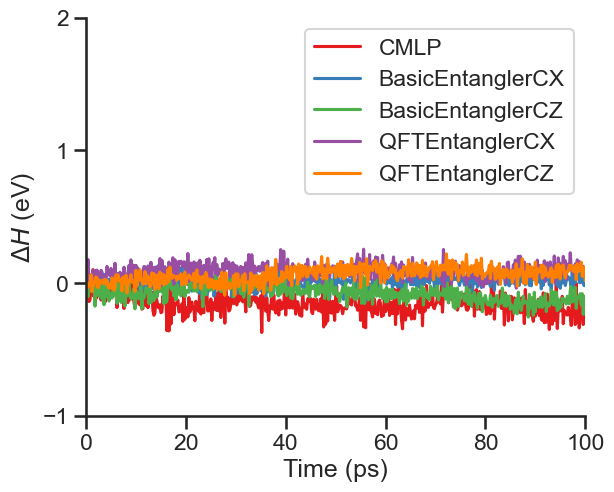

In [18]:
sns.set_palette ("Set1",5)
sns.lineplot (data=data_md_cml, x='Time', y='H', label="CMLP")
sns.lineplot (data=data_md_qml_cx, x='Time', y='H',  label="BasicEntanglerCX")
sns.lineplot (data=data_md_qml_cz, x='Time', y='H', label="BasicEntanglerCZ")
sns.lineplot (data=data_md_qml_equiv_cx, x='Time', y='H',  label="QFTEntanglerCX")
ax=sns.lineplot (data=data_md_qml_equiv_cz, x='Time', y='H', label="QFTEntanglerCZ")
#ax = sns.lineplot (data=data_md_qml_basic, x='Time', y='H',  linestyle='dotted', color='black', label="Basic")
ax.set_xlim ( (0, 100))
ax.set_ylim ( (-1, 2))
ax.set_yticks( (-1,0,1,2))
#ax.set_xticks( (0, 5000, 10000, 15000, 20000))
ax.set_ylabel (r"$\Delta H$ (eV)")
ax.set_xlabel (r"Time (ps)")
sns.despine()
plt.tight_layout (w_pad=1.0)
plt.subplots_adjust (left=0.15, right=0.93, bottom=0.15, top=0.98)
plt.savefig ('fig_MD_H.png', dpi=600)

In [19]:
def read_qml_shot (fname):
    data = {'shots': [], 'RMSE': [], 'log_shots': [], 'Error': [], 'inv_sqrt':[]}
    lines = open(fname,'r').readlines()

    for line in lines[1:-1]:
        words = line.split()
        data['shots'].append (int(words[0]))
        data['RMSE'].append (float(words[1])/64*1000.0)
        data['Error'].append (320.0/np.sqrt(float(words[0])))
        data['log_shots'].append (np.log (float(words[0])) )
        data['inv_sqrt'].append (1.0/np.sqrt (float(words[0])))
    return data

data_shots = read_qml_shot('../Data/qml_shot.dat')

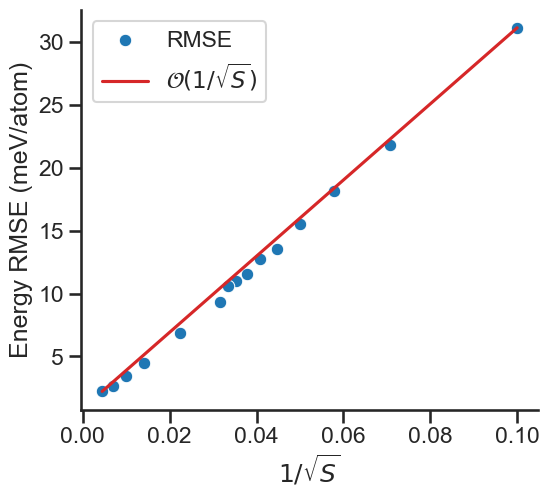

In [20]:
fig, (ax2) = plt.subplots(ncols=1,figsize=(5.5, 5))

sns.scatterplot (data=data_shots, x='inv_sqrt', y='RMSE', label=r"RMSE", color='tab:blue', ax=ax2)
x0 = data_shots['inv_sqrt'][0]
y0 = data_shots['RMSE'][0]
x1 = data_shots['inv_sqrt'][-1]
y1 = data_shots['RMSE'][-1]
dataline = {'x' : [x0, x1], 'y': [y0, y1]}
sns.lineplot (data=dataline, x='x', y='y', label=r"$\mathcal{O}(1/\sqrt{S})$", color='tab:red', ax=ax2 )

ax2.set_ylabel (r"Energy RMSE (meV/atom)")
ax2.set_xlabel (r"$1/\sqrt{S}$")

sns.despine()
plt.tight_layout (w_pad=2.0)
plt.subplots_adjust (left=0.15, right=0.98, bottom=0.15, top=0.95)
#plt.savefig ('fig_shots.pdf',dpi=600)

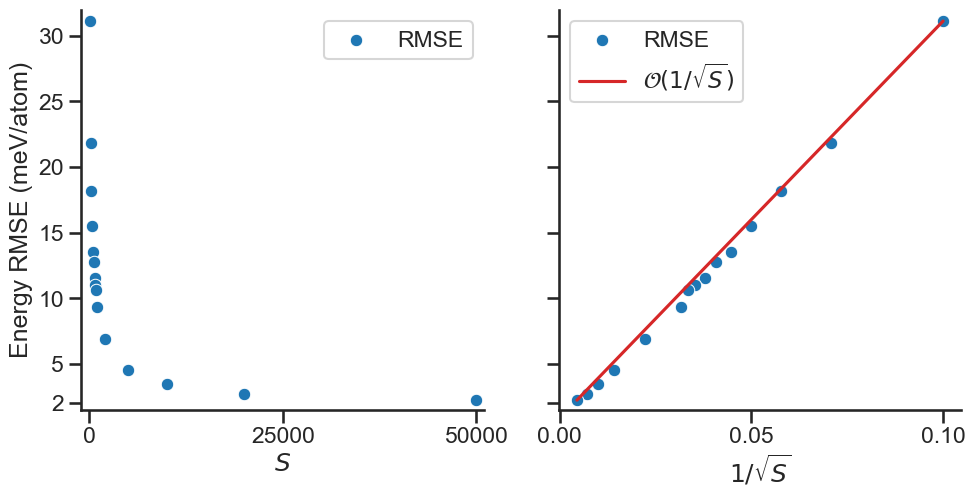

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10, 5), sharey=True)

sns.scatterplot (data=data_shots, x='shots', y='RMSE', label=r"RMSE", color='tab:blue', ax=ax1)

ax1.set_ylabel (r"Energy RMSE (meV/atom)")
ax1.set_xlabel (r"$S$")
ax1.set_xlim ((-1000,51000))
ax1.set_xticks([0,25000,50000])
ax1.set_ylim ((1.5,32))
ax1.set_yticks ([2,5,10,15,20,25,30])


sns.scatterplot (data=data_shots, x='inv_sqrt', y='RMSE', label=r"RMSE", color='tab:blue', ax=ax2)
x0 = data_shots['inv_sqrt'][0]
y0 = data_shots['RMSE'][0]
x1 = data_shots['inv_sqrt'][-1]
y1 = data_shots['RMSE'][-1]
dataline = {'x' : [x0, x1], 'y': [y0, y1]}
sns.lineplot (data=dataline, x='x', y='y', label=r"$\mathcal{O}(1/\sqrt{S})$", color='tab:red', ax=ax2 )

ax2.set_ylabel (r"Energy RMSE (meV/atom)")
ax2.set_xlabel (r"$1/\sqrt{S}$")
ax2.set_xticks([0,0.05,0.1])

sns.despine()
plt.tight_layout ()
plt.subplots_adjust (left=0.1, right=0.98, bottom=0.15, top=0.95)
#plt.savefig ('fig_shots.pdf',dpi=600)

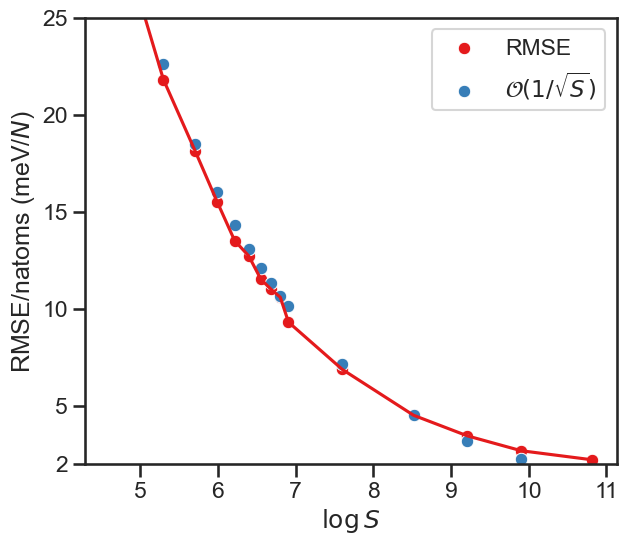

In [23]:
ax = sns.lineplot (data=data_shots, x='log_shots', y='RMSE')
ax = sns.scatterplot (data=data_shots, x='log_shots', y='RMSE', label="RMSE")
ax = sns.scatterplot (data=data_shots, x='log_shots', y='Error', label=r'$ \mathcal{O}(1/\sqrt{S})$')
#ax = sns.lineplot (data=loss_cml, x='epoch', y='loss_F', label='MACE')
ax.set_ylabel (r"RMSE/natoms (meV/$N$)")
ax.set_xlabel (r"$\log{S}$")
ax.set_yticks ([2,5,10,15,20,25])
#ax.set_xlim ((-1000,50000))
ax.set_ylim ((2,25))
plt.subplots_adjust (left=0.15, right=0.98, bottom=0.05, top=0.98)

In [ ]:
data_rdf_shot0 = read_rdf ('../Data/Shots/rdf_race_qml_mc.dat')
data_rdf_shot2K = read_rdf ('../Data/Shots/rdf_race_qml_mc_shot2000.dat')
data_rdf_shot10K = read_rdf ('../Data/Shots/rdf_race_qml_mc_shot10K.dat')
data_rdf_shot50K = read_rdf ('../Data/Shots/rdf_race_qml_mc_shot50K.dat')


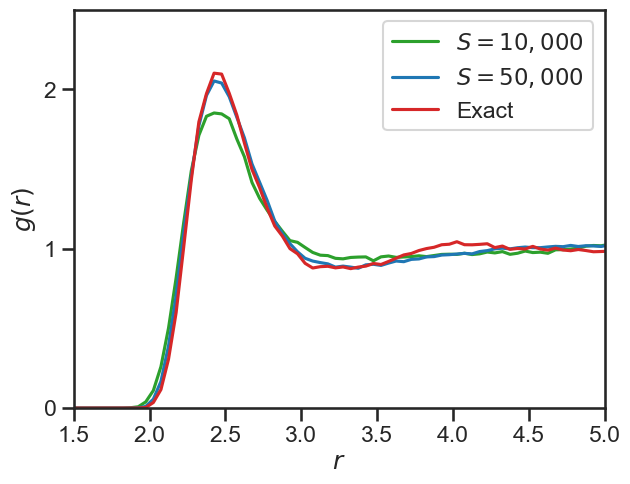

In [26]:
ax = sns.lineplot (data=data_rdf_shot10K, x='x', y='rdf', color='tab:green', label=r"$S=10,000$")
ax = sns.lineplot (data=data_rdf_shot50K, x='x', y='rdf', color='tab:blue', label=r"$S=50,000$")
ax = sns.lineplot (data=data_rdf_shot0, x='x', y='rdf', color='tab:red', label=r"Exact")

ax.set_ylabel (f"$g(r)$")
ax.set_xlabel (f"$r$")
ax.set_xlim ((1.5,5))
ax.set_ylim ((0,2.5))
ax.set_yticks([0, 1, 2])
plt.subplots_adjust (left=0.15, right=0.98, bottom=0.15, top=0.98)
#plt.savefig ('fig_MC_rdf.pdf',dpi=600)

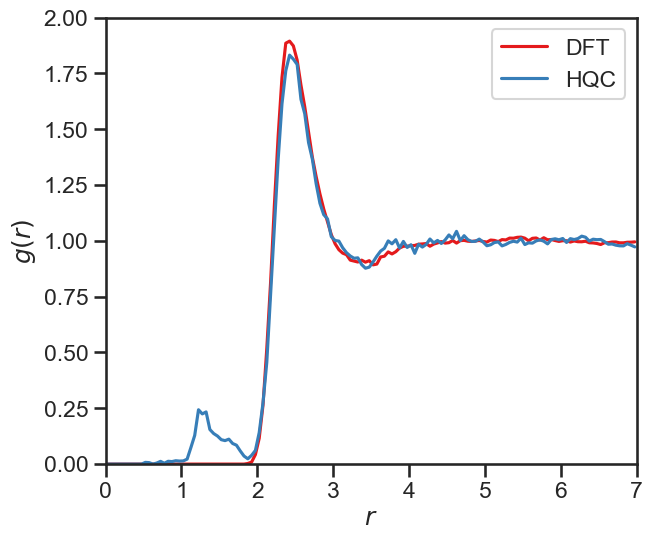

In [28]:
dft_rdf = read_rdf ('../Data/rdf_pbe_t3000.dat')
qml_rdf = read_rdf ('../Data/qml_v3.dat')

ax = sns.lineplot (data=dft_rdf, x='x', y='rdf', label='DFT')
ax = sns.lineplot (data=qml_rdf, x='x', y='rdf', label='HQC')
ax.set_ylabel (f"$g(r)$")
ax.set_xlabel (f"$r$")
ax.set_xlim ((0,7))
ax.set_ylim ((0,2))
plt.subplots_adjust (left=0.15, right=0.98, bottom=0.05, top=0.98)
#plt.savefig ('fig_rdf_qml_error.png',dpi=600)